# kmeans

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import pandas as pd

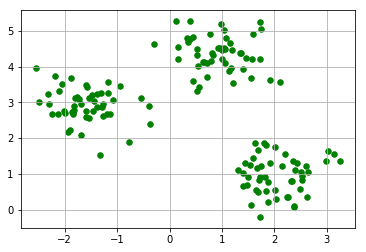

In [2]:
X,y =make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
plt.scatter(X[:,0],X[:,1],c='green',marker='o',s=30)
plt.grid()
plt.show()

# k-means++

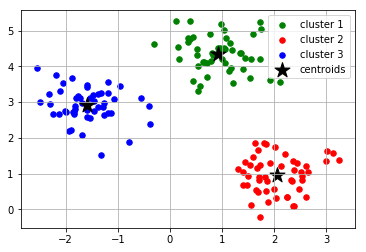

In [3]:
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=30,c='green',marker='o',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=30,c='red',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=30,c='blue',marker='o',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='black',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

# 肘方法

Distortion: 72.48


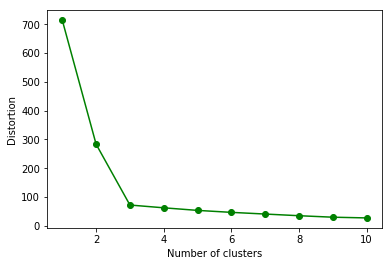

In [4]:
print('Distortion: %.2f' % km.inertia_)#已经拟合好的误差平方和
distortions=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o',c='green')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# 轮廓图

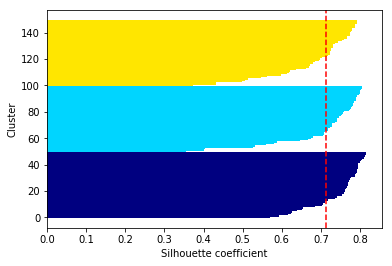

In [5]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower,y_ax_upper = 0, 0
yticks=[]
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.show()

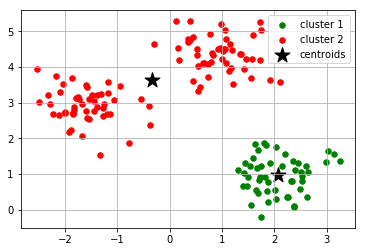

In [6]:
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=30,c='green',marker='o',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=30,c='red',marker='o',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='black',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

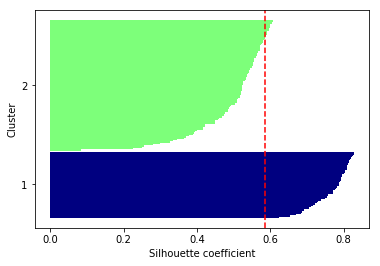

In [7]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower,y_ax_upper = 0, 0
yticks=[]
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks,cluster_labels+1)
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.show()

# 层次聚类-基于距离

In [17]:
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X=np.random.random_sample([5,3])*10
df=pd.DataFrame(X,columns=variables,index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [22]:
#样本间距离矩阵
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


稠密距离矩阵
如下表所示，关联矩阵包含多行，每行代表一次簇的合并，矩阵的第一列和第二列分别表示每个簇最不相似的样本（距离最远），第三列为这些样本间的距离，最后一列为每个簇中样本的数量

In [23]:
row_clusters =linkage(df.values,method='complete',metric='euclidean')
pd.DataFrame(row_clusters,columns=['row label 1','row label 2',
                                   'distance','no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


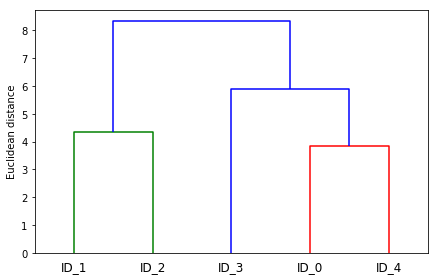

In [27]:
#树状图可视化
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()